# **Milestone** | Exploratory Analysis of Olympic Athletes


<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/2560px-Olympic_rings_without_rims.svg.png" alt="The Olympic Rings" width="320"/>
</div>



# Introduction

In this Milestone, you will analyze a dataset containing information on Olympic medalists from 1896 to 2016. Your goal is to apply practical data analysis skills to explore trends, clean inconsistencies, and generate insights that will support data-driven journalism about the athletes, countries, and events that have shaped Olympic history.


### Dataset Description

You will use the `olympics_dataset.csv` dataset in the `datasets` folder to complete your analysis. Every row represents one athlete's participation in a specific Olympic event. The dataset contains the following columns:

* **ID**: A unique identifying number of each athlete
* **Name**: The name of each athlete
* **Sex**: M or F
* **Age**: The age of an athlete, in years
* **Height**: The height of an athlete, in centimeters
* **Weight**: The weight of an athlete, in kilograms
* **Team**: The name of the athlete’s team. Not always the name of a country.
* **NOC**: National Olympic Committee’s 3 letter code
* **Games**: Year and season
* **Season**: Summer or Winter
* **City**: Host city
* **Sport**: The  or category of olympic event/activity
* **Event**: specific event within a sport, e.g. Men’s 400 meters breaststroke.
* **Medal**: Gold, Silver, Bronze
* **Region**: Name of athlete’s country


To start, import the pandas library, load the data into a DataFrame and preview the first 5 rows.

In [1]:
# import the pandas library
import pandas as pd

# load the data into a dataframe

olympics = pd.read_csv('datasets/olympics.csv')
# preview the dataframe
olympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland
7,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland
8,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland
9,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway


## Task 1: Data Inspection
Start by inspecting the dataset to understand its structure and the types of questions you can ask. You'll familiarize yourself with the data columns and initial statistics.

In [2]:
# Inspect the numbers of rows and columns
print("Shape of dataser is:",olympics.shape)

Shape of dataser is: (39783, 16)


In [3]:
# Print out all the column names
print("Column names:", olympics.columns.tolist())

Column names: ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region']


In [4]:
# Inspect column data types, null values, and other info
print("Dataset info:", olympics.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39783 non-null  int64  
 1   Name    39783 non-null  object 
 2   Sex     39783 non-null  object 
 3   Age     39051 non-null  float64
 4   Height  31072 non-null  float64
 5   Weight  30456 non-null  float64
 6   Team    39783 non-null  object 
 7   NOC     39783 non-null  object 
 8   Games   39783 non-null  object 
 9   Year    39783 non-null  int64  
 10  Season  39783 non-null  object 
 11  City    39783 non-null  object 
 12  Sport   39783 non-null  object 
 13  Event   39783 non-null  object 
 14  Medal   39783 non-null  object 
 15  region  39774 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 4.9+ MB
Dataset info: None


As you're reviewing the .info() output from the dataset, you should notice there are missing values some of the columns! Ask ChatGPT to recommend approaches for dealing with missing data in your analysis.

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> I’m working with a dataset of Olympic medalists, and I’ve noticed some missing values in columns like Age, Height, Weight, and Region. I’m planning to ignore these missing values. Is this a reasonable approach for my analysis, or are there any important considerations I should be aware of before doing so?


  </span>
</div>

In [5]:
# Use unique() to examine the types of medals in the dataset.
print("The types of medals are:", olympics['Medal'].unique())

The types of medals are: ['Gold' 'Bronze' 'Silver']


## Task 2: Data Cleaning
Now that we have a sense of the data, let's clean it to make sure it's ready for analysis.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>When renaming/dropping columns, make sure to assign the result back to the dataframe to ensure that the new column names <em> replace </em> the old ones in your dataset.
</span>
</div>

In [6]:
# Rename 'NOC' column to 'CountryCode'
# Rename 'region' column to 'Country'
olympics.rename(columns={'NOC': 'CountryCode', 'region': 'Country'}, inplace=True)
# preivew the dataframe again
print("After renaming columns:")
print(olympics.head())

After renaming columns:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
1  15      Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
2  15      Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
3  16  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0         Finland   
4  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   

  CountryCode        Games  Year  Season       City       Sport  \
0         DEN  1900 Summer  1900  Summer      Paris  Tug-Of-War   
1         FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
2         FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
3         FIN  2014 Winter  2014  Winter      Sochi  Ice Hockey   
4         FIN  1948 Summer  1948  Summer     London  Gymnastics   

                                    Event   Medal  Country  
0             Tug-Of-War Men's Tug-Of-War    Gold

In [7]:
# Remove the 'Team' column
olympics.drop(columns = 'Team', inplace = True)
# preivew the dataframe again
olympics.head()

,ID,Name,Sex,Age,Height,Weight,CountryCode,Games,Year,Season,City,Sport,Event,Medal,Country
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


## Task 3: Data Analysis

It's time to analyze the data to uncover factual information about athletes, medals, and events! You'll explore:
- Youngest and oldest medalists
- Medal count
- Number of unique events
- Average age of medalists
- Top 10 winningest countries by total medal count



**1.** What is the **youngest** age of an Olympic medalist?

In [8]:
# youngest age
medalists = olympics[olympics['Medal'].notna()]  # Keep only medal winners
print("Youngest medalist age:", medalists['Age'].min())

Youngest medalist age: 10.0


**2.** What is the **oldest** age of an Olympic medalist?

In [9]:
# oldest age
print("Oldest medalist age:", medalists['Age'].max())

Oldest medalist age: 73.0


**3.** Summarize the number of medals awarded by type. How many of each medal were awarded?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Think about which column contains the medal types, and how you could <em>count</em> the number of times each <em>value</em> appears.
</span>
</div>

In [10]:
# number of medals awarded by type
print("Medals by type:\n", medalists['Medal'].value_counts())

Medals by type:
 Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


**4.** How many (unique) events are there?

In [11]:
# Number of unique events
print("Unique events:", medalists['Event'].nunique())

Unique events: 756


**5.** How many (unique) sports are there?

In [12]:
# Number of unique sports
print("Unique sports:", medalists['Sport'].nunique())

Unique sports: 66


**6.** What is the average age of an Olympic medalist? Round the age to the nearest whole number.

In [13]:
# average age of an Olympic medalist?
print("Average age of medalists:", round(medalists['Age'].mean()))

Average age of medalists: 26


**7A.** Among the 10 oldest medalists, what are the most common sports?


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Start by sorting the data so the oldest athletes appear first. Then look only at a small slice of the data — you don’t need to analyze the full dataset to answer the question.
</span>
</div>

In [14]:
# most common sports among the 10 oldest medalists
# Sort by age (descending) and get the top 10 oldest medalists
oldest_10 = medalists.sort_values(by='Age', ascending=False).head(10)

# Show the sports they competed in
print("Sports of the 10 oldest medalists:\n", oldest_10['Sport'])

Sports of the 10 oldest medalists:
 6072     Art Competitions
8279     Art Competitions
33952            Shooting
21901             Sailing
21902             Sailing
12614    Art Competitions
34707    Art Competitions
21198    Art Competitions
8340              Archery
25165             Sailing
Name: Sport, dtype: object


**7B.** To get a clearer view of the sports these athletes participated in, focus on the `Sport` column. After identifying the top 10 oldest athletes, count how many times each sport appears among them. This is a more precise way to identify the most common sports among oldest medalists!


In [15]:
# most common sports among the 10 oldest medalists with .value_counts
print("Most common sports among top 10 oldest medalists:\n", oldest_10['Sport'].value_counts())

Most common sports among top 10 oldest medalists:
 Art Competitions    5
Sailing             3
Shooting            1
Archery             1
Name: Sport, dtype: int64


**8.** What are the 10 winningest countries in total medal count?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You'll need to count the number of times each country appears in the dataset but only display the top 10!
</span>
</div>

In [16]:
# What are the 10 winningest countries in total medal count?
print("Top 10 winningest countries:\n", medalists['Country'].value_counts().head(10))

Top 10 winningest countries:
 USA          5637
Russia       3947
Germany      3756
UK           2068
France       1777
Italy        1637
Sweden       1536
Canada       1352
Australia    1349
Hungary      1135
Name: Country, dtype: int64


**9.** How many medals have been awarded in the sport of trampolining?

In [17]:
# Trampolining medals
trampolining_medals = medalists[medalists['Sport'] == 'Trampolining'].shape[0]
print("Number of Trampolining medals awarded:", trampolining_medals)

Number of Trampolining medals awarded: 30


## Task 4: Find the Story
Now that you’ve explored the dataset and uncovered some key facts about athletes, events, and countries, it’s time to think like a data journalist.

Based on your findings:

- What trend, pattern, or outlier stood out to you?

- What topic would you pitch as the focus of a data-driven reporting article?

- Why do you think it’s interesting or important to explore further?

Write a short pitch (3–5 sentences) describing:

1. The angle you would pursue

2. What specific data points support it

3. What additional information you might want to gather

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> I’ve explored a dataset about Olympic medalists and found [insert key findings]. I want to pitch a story based on these findings. Can you suggest a few ways to frame the story to make it interesting for a general audience?


  </span>
</div>


I’ve explored a dataset about Olympic medalists and found that the youngest medalist was just **10 years old**, while the oldest was **73**, with **Art Competitions** and **Sailing** appearing frequently among older medalists. I want to pitch a story exploring the **extreme age range of Olympic champions**, highlighting how age influences athletic performance and event types. This story would use data on **age, sport, and medal type** to show where youth dominates (e.g., gymnastics) and where experience shines (e.g., shooting, sailing, art). To enrich the story, I’d like to gather quotes from medalists of different age groups and explore **when and why age matters** in the Olympics.

## LevelUp
Explore additional questions to dive deeper into the dataset and see how the insights you uncover might influence your pitch or reporting. These extra credit tasks offer a chance to refine your understanding and discover new angles for potential stories 😎



**1.** Use a combination of filters to find out how many gold medals were awarded to the United States?

In [18]:
# gold medals awarded to the United States
us_gold = medalists[(medalists['Country'] == 'USA') & (medalists['Medal'] == 'Gold')]
print(f"Gold medals awarded to the USA: {us_gold.shape[0]:,}")

Gold medals awarded to the USA: 2,638


**2.** List the Olympic Games in dataset, starting with the most recent

In [19]:
# Olympic Games in the dataset
olympic_games = olympics['Games'].drop_duplicates().sort_values(ascending=False)
print("Olympic Games (most recent first):\n", olympic_games.to_list())

Olympic Games (most recent first):
 ['2016 Summer', '2014 Winter', '2012 Summer', '2010 Winter', '2008 Summer', '2006 Winter', '2004 Summer', '2002 Winter', '2000 Summer', '1998 Winter', '1996 Summer', '1994 Winter', '1992 Winter', '1992 Summer', '1988 Winter', '1988 Summer', '1984 Winter', '1984 Summer', '1980 Winter', '1980 Summer', '1976 Winter', '1976 Summer', '1972 Winter', '1972 Summer', '1968 Winter', '1968 Summer', '1964 Winter', '1964 Summer', '1960 Winter', '1960 Summer', '1956 Winter', '1956 Summer', '1952 Winter', '1952 Summer', '1948 Winter', '1948 Summer', '1936 Winter', '1936 Summer', '1932 Winter', '1932 Summer', '1928 Winter', '1928 Summer', '1924 Winter', '1924 Summer', '1920 Summer', '1912 Summer', '1908 Summer', '1906 Summer', '1904 Summer', '1900 Summer', '1896 Summer']


**3.** What is the average medalist height in the most recent Winter Olympics. Format your answer into Feet' Inches''.

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> "How can I convert 175 inches into feet and inches in Python? Can you show me the code for that?"
  </span>
</div>

In [20]:
# average medalist height in the most recent Winter Olympics

# Find the most recent Winter Olympics year
recent_winter_year = olympics[olympics['Season'] == 'Winter']['Year'].max()

# Filter medalists from the most recent Winter Olympics
recent_winter_medalists = medalists[(medalists['Season'] == 'Winter') & (medalists['Year'] == recent_winter_year)]

# Calculate average height in cm (excluding missing values)
avg_height_cm = recent_winter_medalists['Height'].mean()

# Convert average height from cm to inches
avg_height_in = avg_height_cm / 2.54

# Convert inches to feet and remaining inches
feet = int(avg_height_in // 12)
inches = round(avg_height_in % 12)

# Display the result in Feet' Inches'' format
print(f"Average medalist height in {recent_winter_year} Winter Olympics: {feet}\' {inches}\'\'")


Average medalist height in 2014 Winter Olympics: 5' 9''


**4.** What is the average medalist **weight** in the most recent Winter Olympics. Round the average weight to the nearest 2 decimals.

In [21]:
# Average medalist weight in the most recent Winter Olympics
# Calculate and round average weight
avg_weight = round(recent_winter_medalists['Weight'].mean(), 2)

# Display the result
print(f"Average medalist weight in {recent_winter_year} Winter Olympics: {avg_weight} kg")

Average medalist weight in 2014 Winter Olympics: 72.21 kg


**5.** What is the average medalist **height** in the most recent Summer Olympics. Format your answer into Feet' Inches''.

In [22]:
# Average medalist height in the most recent Summer Olympics

# Find the most recent Summer Olympics year
recent_summer_year = olympics[olympics['Season'] == 'Summer']['Year'].max()

# Filter medalists from that Summer Olympics
recent_summer_medalists = medalists[(medalists['Season'] == 'Summer') & (medalists['Year'] == recent_summer_year)]

# Calculate average height in cm
avg_height_cm_summer = recent_summer_medalists['Height'].mean()

# Convert cm to inches
avg_height_in_summer = avg_height_cm_summer / 2.54

# Convert inches to feet and inches
feet_summer = int(avg_height_in_summer // 12)
inches_summer = round(avg_height_in_summer % 12)

# Display the result
print(f"Average medalist height in {recent_summer_year} Summer Olympics: {feet_summer}\' {inches_summer}\'\'")


Average medalist height in 2016 Summer Olympics: 5' 10''


**6.** What is the average medalist **weight** in the most recent Summer Olympics. Round the average weight to the nearest 2 decimals.

In [23]:
# Average medalist weight in the most recent Summer Olympics
# Calculate and round average weight
avg_weight_summer = round(recent_summer_medalists['Weight'].mean(), 2)

# Display the result
print(f"Average medalist weight in {recent_summer_year} Summer Olympics: {avg_weight_summer} kg")

Average medalist weight in 2016 Summer Olympics: 73.96 kg


**7.** Import `plotly.express` and create a bar chart to visualize the top 10 countries with the most medals by using the data you assigned in Task 3.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong> You'll need to asssign top 10 winningest countries table from Task 3 to it's own variable!
</span>
</div>



In [24]:
# Import plotly express library
import plotly.express as px

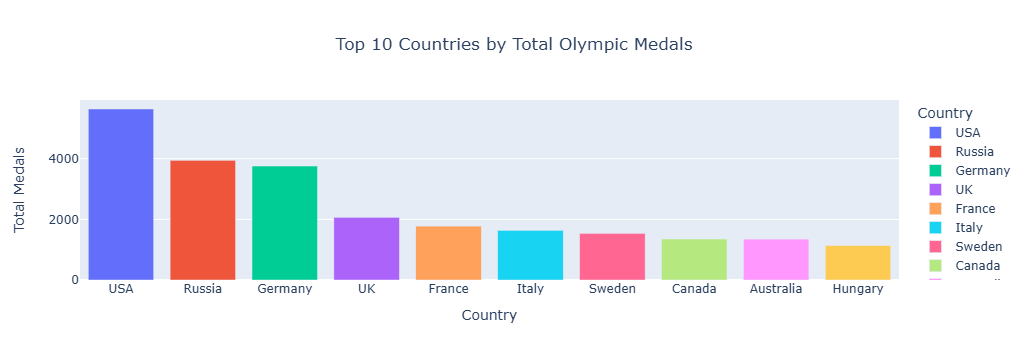

In [26]:
# Asssign top 10 winningest countries table to a variable
top_10_countries = medalists['Country'].value_counts().head(10).reset_index()
top_10_countries.columns = ['Country', 'Medal Count']

# Visualize the table as a bar chart
fig = px.bar(top_10_countries, 
             x = 'Country', 
             y = 'Medal Count',
             color = 'Country',
             title = 'Top 10 Countries by Total Olympic Medals',
             labels = {'Country': 'Country', 'Medal Count': 'Total Medals'})

# Center the title
fig.update_layout(title_x=0.5)

fig.show()

